In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from enum import IntEnum

%config InlineBackend.figure_format = 'svg'
pd.set_option('display.precision', 2)

In [3]:
class AgeCategory(IntEnum):
    YOUNG = 1
    MIDDLE_AGED = 2
    OLD = 3
    UNKNOWN = 4

In [4]:
def define_age_category(age):
    if age < 30 and age != np.nan:
        return AgeCategory.YOUNG
    elif age < 60 and age != np.nan:
        return AgeCategory.MIDDLE_AGED
    elif age > 60 and age != np.nan:
        return AgeCategory.OLD
    else:
        return AgeCategory.UNKNOWN

In [5]:
df = pd.read_csv('data/titanic_train.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
df[(df['Embarked'] == 'C') & (df['Fare'] > 200)].sort_values(by='Fare', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.53,NaN,C
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.53,C45,C


In [8]:
age_categories = [define_age_category(age) for age in df['Age']]
df['Age_category'] = age_categories

In [9]:
#  1.Сколько мужчин/женщин находилось на борту? 
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
#  2. Выведите распределение переменной Pclass (социально-экономический статус)
#  и это же распределение, только для мужчин / женщин по отдельности. 
#  Сколько было мужчин 2-го класса?
df.Pclass.describe()

count    891.00
mean       2.31
std        0.84
min        1.00
25%        2.00
50%        3.00
75%        3.00
max        3.00
Name: Pclass, dtype: float64

In [11]:
#df['Sex'].value_counts()
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [12]:
#  3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.
df.Fare.describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

In [13]:
#  4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет?
#  Каковы доли выживших в обеих группах?
pd.crosstab(df.Survived, df.Age_category)

Age_category,1,2,3,4
Survived,,,,
0,228,177,17,127
1,156,127,5,54


In [14]:
#df[(df['Age_category'] == AgeCategory.YOUNG)].value_counts(normalize=True)
survived_young_percent = len(df[(df['Age_category'] == AgeCategory.YOUNG) & df['Survived'] == 1]) / len(df[(df['Age_category'] == AgeCategory.YOUNG)])
survived_old_percent = len(df[(df['Age_category'] == AgeCategory.OLD) & df['Survived'] == 1]) / len(df[(df['Age_category'] == AgeCategory.OLD)])

ys = df.loc[df['Age_category'] == AgeCategory.YOUNG, 'Survived'].mean()
os = df.loc[df['Age_category'] == AgeCategory.OLD, 'Survived'].mean()

survived_young_percent, survived_old_percent, ys, os

(0.40625, 0.22727272727272727, 0.40625, 0.22727272727272727)

In [15]:
#  5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?
df.loc[df['Sex'] == 'male', 'Survived'].mean(), df.loc[df['Sex'] == 'female', 'Survived'].mean()

(0.18890814558058924, 0.7420382165605095)

In [16]:
#  6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?
male_names = df.loc[df.Sex == 'male', 'Name']
first_names = male_names.apply(
    lambda full_name: full_name.split(',')[1].split()[1]
)
first_names.value_counts().head()

Name
William    35
John       25
George     14
Charles    13
Thomas     13
Name: count, dtype: int64

<BarContainer object of 1 artists>

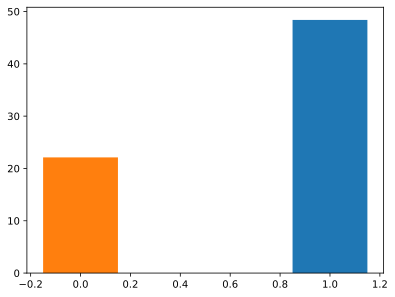

In [17]:
#  7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. 
#  Средний возраст погибших выше, верно?  

#df.groupby('Survived')['Age', 'Fare'].describe()
fig = plt.figure()
ax = fig.add_subplot()
width = 0.3
ax.bar(1, df[df['Survived'] == 1]['Fare'].mean(), width=width)
ax.bar(0, df[df['Survived'] == 0]['Fare'].mean(), width=width)

In [18]:
df.loc[((df['Sex'] == 'male') & (df['Pclass'] == 1)), 'Age'].mean()

41.28138613861386

In [19]:
df.loc[((df['Sex'] == 'female') & (df['Pclass'] == 1)), 'Age'].mean()

34.61176470588235

In [20]:
#  8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?
#        Выберите верные утверждения:
#            - В среднем мужчины 1-го класса старше 40 лет
#            - В среднем женщины 1-го класса старше 40 лет
#            - Мужчины всех классов в среднем старше женщин того же класса
#            - В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса
df.groupby(['Sex', 'Pclass']).agg({'Age': 'mean'})

Age
Sex    Pclass       
female 1       34.61
       2       28.72
       3       21.75
male   1       41.28
       2       30.74
       3       26.51